In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("grocery.csv")

In [4]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1125 non-null   object
 1   Store      1125 non-null   object
 2   Category   1125 non-null   object
 3   Item       1125 non-null   object
 4   Brand      1125 non-null   object
 5   Unit       1125 non-null   object
 6   Price_PKR  1125 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 61.7+ KB


In [5]:
df['Price_PKR'] = pd.to_numeric(df['Price_PKR'])

In [11]:
def convert_to_grams(unit):
    unit = unit.lower().strip().replace(" ", "")

    if 'kg' in unit:
        return float(unit.replace('kg','')) * 1000
    elif 'g' in unit:
        return float(unit.replace('g',''))
    elif 'l' in unit:
        return float(unit.replace('l','')) * 1000
    else:
        return np.nan


In [12]:
import re
def convert_to_grams(unit):
    unit_lower = unit.lower().strip()

    unit_patterns = {
        'kg': 1000,
        'ml': 1,
        'g': 1,
        'l': 1000,
        'm': 1
    }

    # Corrected regex to extract numerical part
    match = re.search(r'(\d+\.?\d*)', unit_lower)
    if not match:
        return np.nan

    try:
        value = float(match.group(1))
    except ValueError:
        return np.nan

    if 'kg' in unit_lower:
        return value * unit_patterns['kg']
    elif 'ml' in unit_lower:
        return value * unit_patterns['ml']
    elif 'g' in unit_lower:
        return value * unit_patterns['g']
    elif 'l' in unit_lower:
        return value * unit_patterns['l']
    elif 'm' in unit_lower:
        return value * unit_patterns['m']
    else:
        return np.nan

df['quantity_grams'] = df['Unit'].apply(convert_to_grams)

display(df.head())

,Date,Store,Category,Item,Brand,Unit,Price_PKR,quantity_grams
0,10/1/2025,Metro,Staples,Basmati Rice,Falak,1 kg,300,1000.0
1,10/1/2025,Imtiaz,Staples,Basmati Rice,Ponam,1 kg,312,1000.0
2,10/1/2025,Carrefour,Staples,Basmati Rice,Falak,1 kg,321,1000.0
3,10/1/2025,Chase Up,Staples,Basmati Rice,Falak,1 kg,324,1000.0
4,10/1/2025,Naheed,Staples,Basmati Rice,Falak,1 kg,336,1000.0


In [14]:
df['price_per_kg'] = (df['Price_PKR'] / df['quantity_grams']) * 1000


In [15]:
df = df.dropna(subset=['price_per_kg'])
df = df.drop_duplicates()
df.isnull().sum()


,0
Date,0
Store,0
Category,0
Item,0
Brand,0
Unit,0
Price_PKR,0
quantity_grams,0
price_per_kg,0


In [18]:
normalized_view = df.sort_values(by='price_per_kg')
display(normalized_view)

,Date,Store,Category,Item,Brand,Unit,Price_PKR,quantity_grams,price_per_kg
210,10/1/2025,Metro,Beverages,Mineral Water,Nestle,1.5 L,90,1500.0,60.000000
585,11/1/2025,Metro,Beverages,Mineral Water,Nestle,1.5 L,92,1500.0,61.333333
211,10/1/2025,Imtiaz,Beverages,Mineral Water,Nestle,1.5 L,92,1500.0,61.333333
212,10/1/2025,Carrefour,Beverages,Mineral Water,Nestle,1.5 L,93,1500.0,62.000000
213,10/1/2025,Chase Up,Beverages,Mineral Water,Nestle,1.5 L,93,1500.0,62.000000
...,...,...,...,...,...,...,...,...,...
239,10/1/2025,Naheed,Packaged,Coffee,Nescafe,200 g,1012,200.0,5060.000000
987,12/1/2025,Carrefour,Packaged,Coffee,Nescafe,200 g,1014,200.0,5070.000000
988,12/1/2025,Chase Up,Packaged,Coffee,Nescafe,200 g,1024,200.0,5120.000000
614,11/1/2025,Naheed,Packaged,Coffee,Nescafe,200 g,1032,200.0,5160.000000


In [19]:
df.groupby('Store')['price_per_kg'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
Carrefour,195.0,677.951537,792.509829,62.000000,260.0,407.000000,824.5,5070.0
Chase Up,195.0,684.053048,800.219258,62.000000,261.5,413.333333,832.0,5120.0
Imtiaz,195.0,660.374878,770.793517,61.333333,254.5,396.666667,800.5,4930.0
Metro,195.0,640.167347,748.336595,60.000000,250.0,380.000000,777.5,4785.0
Naheed,195.0,702.584914,821.120069,62.666667,271.5,426.666667,855.5,5260.0


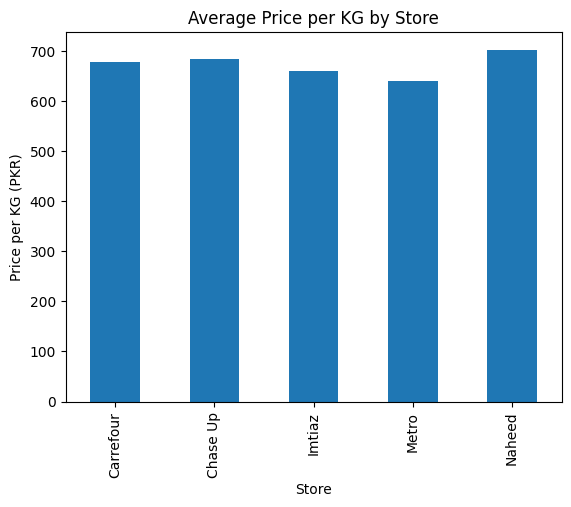

In [25]:
store_avg = df.groupby('Store')['price_per_kg'].mean()
store_avg.plot(kind='bar', title='Average Price per KG by Store')
plt.ylabel("Price per KG (PKR)")
plt.xlabel("Store")
plt.show()

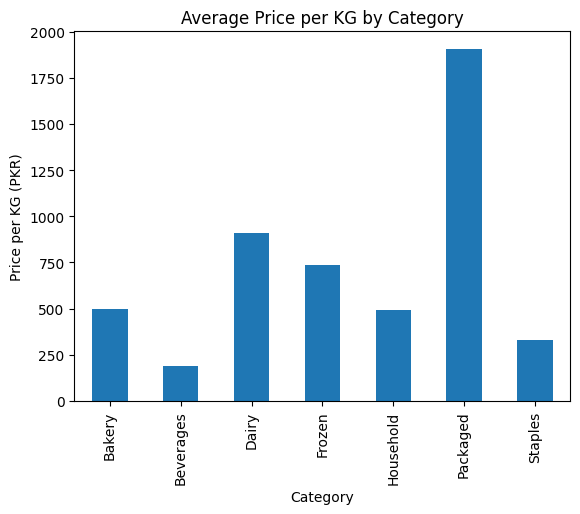

In [26]:
category_avg = df.groupby('Category')['price_per_kg'].mean()

category_avg.plot(kind='bar', title='Average Price per KG by Category')
plt.ylabel("Price per KG (PKR)")
plt.xlabel("Category")
plt.show()

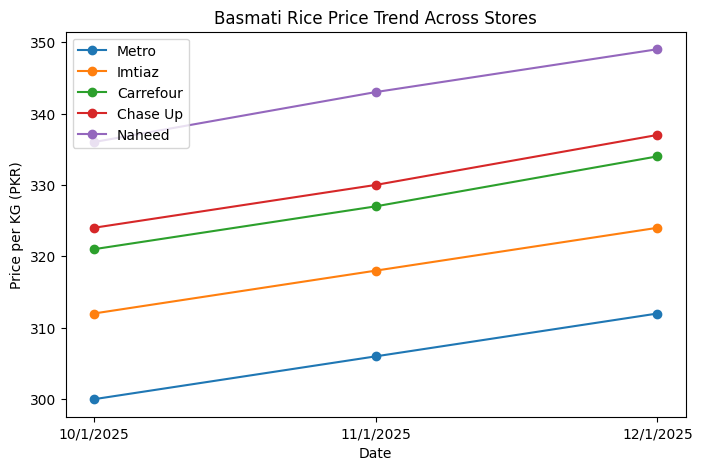

In [27]:
item_df = df[df['Item'] == 'Basmati Rice']

plt.figure(figsize=(8,5))
for store in item_df['Store'].unique():
    s_data = item_df[item_df['Store'] == store]
    plt.plot(s_data['Date'], s_data['price_per_kg'], marker='o', label=store)

plt.title("Basmati Rice Price Trend Across Stores")
plt.xlabel("Date")
plt.ylabel("Price per KG (PKR)")
plt.legend()
plt.show()

In [29]:
item_df = item_df.copy()
item_df['Date'] = pd.to_datetime(item_df['Date'])
item_df['date_ordinal'] = item_df['Date'].map(pd.Timestamp.toordinal)

X = item_df[['date_ordinal']]
y = item_df['price_per_kg']

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

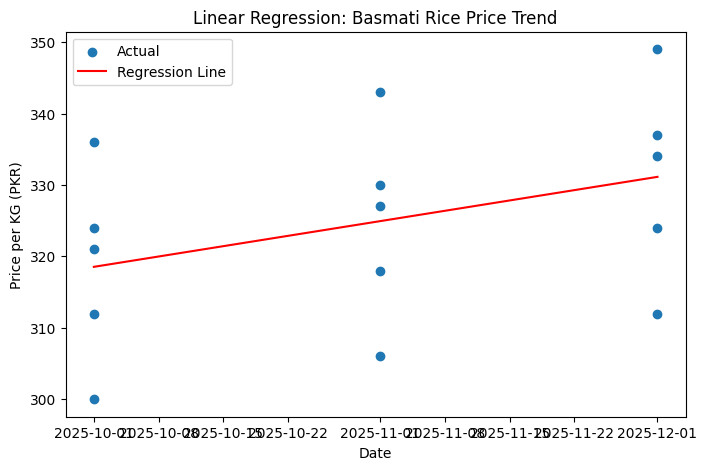

In [32]:
item_df['predicted_price'] = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(item_df['Date'], item_df['price_per_kg'], label='Actual')
plt.plot(item_df['Date'], item_df['predicted_price'], color='red', label='Regression Line')

plt.title("Linear Regression: Basmati Rice Price Trend")
plt.xlabel("Date")
plt.ylabel("Price per KG (PKR)")
plt.legend()
item_df = item_df.sort_values('Date')

plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", round(mse, 2))
print("R² Score:", round(r2, 4))

MSE: 151.26
R² Score: 0.1489


In [35]:
assert df['price_per_kg'].min() > 0
assert df['price_per_kg'].isnull().sum() == 0
assert df['Date'].isnull().sum() == 0

print("All validation checks passed successfully.")

All validation checks passed successfully.
